In [1]:
import pandas as pd
import matplotlib .pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('company_data.csv')

In [3]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
## To convert object variable intp int64
data.iloc[:,6]=le.fit_transform(data.iloc[:,6])
data.iloc[:,9]=le.fit_transform(data.iloc[:,9])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [9]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=10,contamination=0.02)
clf.fit(data)

IsolationForest(contamination=0.02, random_state=10)

In [10]:
y_preds_outliers=clf.predict(data)

In [11]:
data['scores']=clf.decision_function(data)

In [16]:
data['anomaly']=clf.predict(data.iloc[:,0:11])

In [17]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.106265,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.094003,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.132237,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.138284,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.107986,1


In [18]:
data[data['anomaly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
42,10.43,77,69,0,25,24,2,50,18,1,0,-0.021214,-1
57,0.91,93,91,0,22,117,0,75,11,1,0,-0.003241,-1
75,8.55,88,111,23,480,92,0,36,16,0,1,-0.020586,-1
106,0.16,102,33,0,217,139,2,70,18,0,0,-0.001391,-1
165,0.37,147,58,7,100,191,0,27,15,1,1,-0.018682,-1
174,0.00,139,24,0,358,185,2,79,15,0,0,-0.019984,-1
208,7.78,86,54,0,497,64,0,33,12,1,0,-0.003206,-1
367,14.37,95,106,0,256,53,1,52,17,1,0,-0.022120,-1


In [19]:
data1 = data[~data['anomaly'].isin([-1])]
data1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.106265,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.094003,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.132237,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.138284,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.107986,1
5,10.81,124,113,13,501,72,0,78,16,0,1,0.004425,1
6,6.63,115,105,0,45,108,2,71,15,1,0,0.093599,1
7,11.85,136,81,15,425,120,1,67,10,1,1,0.100017,1
8,6.54,132,110,0,108,124,2,76,10,0,0,0.053230,1
9,4.69,132,113,0,131,124,2,76,17,0,1,0.060487,1


In [20]:
columns=data1.iloc[:,1:].columns
columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'scores', 'anomaly'],
      dtype='object')

In [21]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [22]:
data.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [23]:
data.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [24]:
from sklearn.preprocessing import Binarizer

In [25]:
bin=Binarizer(threshold=7.49)

In [26]:
col=data1['Sales'].values
col=col.reshape(-1,1)

In [27]:
col;

In [28]:
x=data1.iloc[:,1:]
y=bin.fit_transform(col)

In [29]:
y

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

In [30]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.106265,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.094003,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.132237,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.138284,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.107986,1


In [31]:
data2=data1.drop(data1.columns[[4, 8, 9, 10, 11, 12,]],axis=1)

In [32]:
data2.head()

,Sales,CompPrice,Income,Advertising,Price,ShelveLoc,Age
0,9.50,138,73,11,120,0,42
1,11.22,111,48,16,83,1,65
2,10.06,113,35,10,80,2,59
3,7.40,117,100,4,97,2,55
4,4.15,141,64,3,128,0,38


In [33]:
x1=data2.iloc[:,1:]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=40)

In [69]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [71]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

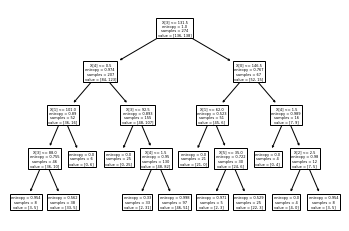

In [72]:
tree.plot_tree(model);

In [83]:
preds=model.predict(x_test)
preds

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.])

In [74]:
pd.Series(preds).value_counts()

1.0    84
0.0    34
dtype: int64

In [75]:
pred1 = model.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y_train, pred1)
print(confusion_matrics)

[[ 80  56]
 [  8 130]]


In [76]:
((130+80)/(80+56+8+130)*100)

76.64233576642336

In [77]:
confusion_matrics=confusion_matrix(y_test, preds)
print(confusion_matrics)

[[27 34]
 [ 7 50]]


In [78]:
((27+50)/(27+34+7+50))*100

65.2542372881356

Here our model is slightly overfitted.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [79]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [80]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [85]:
preds=model_gini.predict(x_test)
preds

array([1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.])

In [86]:
pd.Series(preds).value_counts()

1.0    70
0.0    48
dtype: int64

In [87]:
pred1 = model_gini.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y_train, pred1)
print(confusion_matrics)

[[ 99  37]
 [ 20 118]]


In [88]:
((99+118)/(99+37+20+118))*100

79.1970802919708

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y_test, preds)
print(confusion_matrics)

[[38 23]
 [10 47]]


In [90]:
((38+47)/(38+23+10+47))*100

72.03389830508475

Here too, our model is slightly overfitted.